In [1]:
# enable automatic reloading of the notebook
%load_ext autoreload
%autoreload 2

# LM-EMD

In [27]:
from src.models.model import Seq_LM_EMD

In [32]:
model = Seq_LM_EMD(
    model="roberta-large-mnli", 
    tokenizer="roberta-large-mnli", 
    num_layers=19,
    distance="seq",
    weight_dist="idf",
    temporal_type="OPW",
    lang="en",
    reg1=1, 
    reg2=0.1,
    nit=100,
)

Some weights of the model checkpoint at roberta-large-mnli were not used when initializing RobertaModel: ['classifier.dense.weight', 'classifier.dense.bias', 'classifier.out_proj.weight', 'classifier.out_proj.bias']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


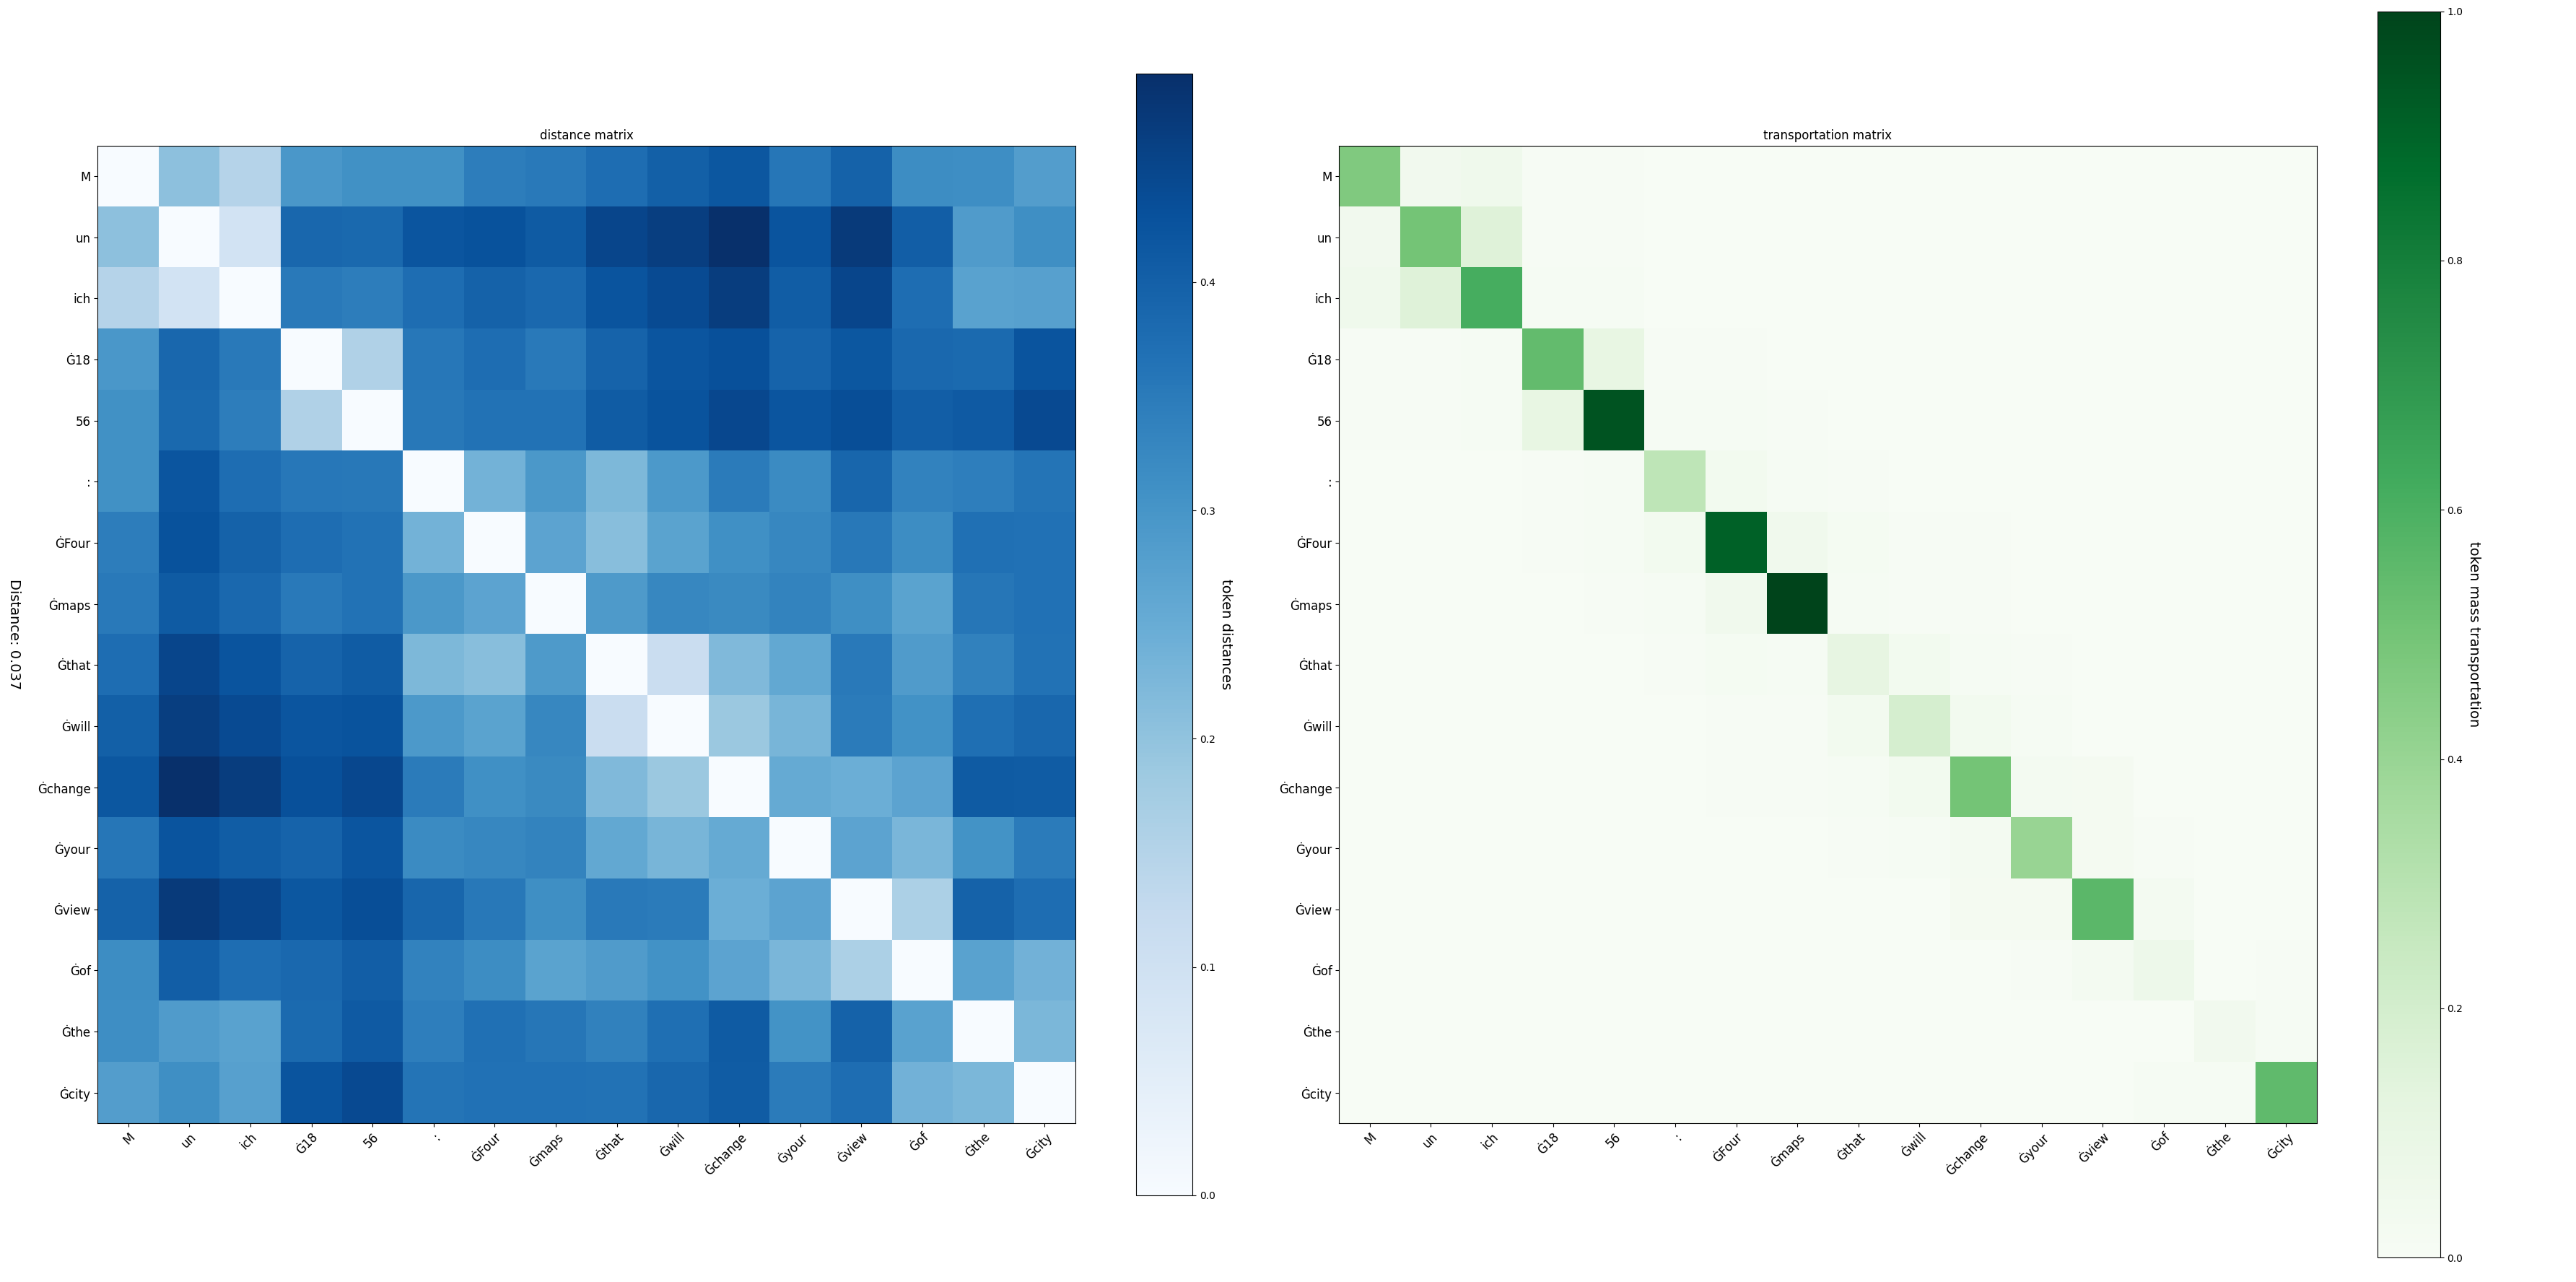

In [33]:
system_text = 'Munich 1856: Four maps that will change your view of the city'
references = ['Munich 1856: Four maps that will change your view of the city']
model.visualize(system_text, references)

# Checklist

In [23]:
from src.utils.checklist.translation import TranslationTemplates
TT = TranslationTemplates()

In [24]:
system_texts = [TT.jumble('Munich 1856: Four maps that change your view of the city') for i in range(10)]

In [34]:
system_texts = [
    'view Munich Four that : of 1856 city maps change your the',
    'city the maps change your 1856 that Four : view of Munich',
    'the your : change Four Munich 1856 that view of maps city',
    ': maps Munich your the that Four change city view 1856 of',
    'Four Munich view that city of your 1856 change the maps :',
    'that city maps of your Four 1856 change Munich view the :',
    ': city 1856 your maps view Four the of Munich that change',
    'change your that Four 1856 city maps Munich the view of :',
    'that of your Munich the change city Four 1856 maps view :',
    'maps your that Four : the city change of view Munich 1856'
]

In [35]:
model.visualize(references[0], system_texts)